# Independent component analysis

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA

plt.rcParams['figure.figsize'] = (10.0, 6.0)

# Simulated data

In [6]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

In [8]:
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)

In [9]:
S = np.c_[s1, s2, s3]


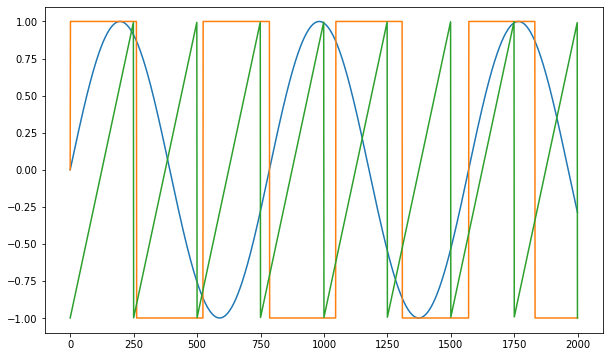

In [10]:
_ = plt.plot(S)

In [12]:
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(S, A.T)

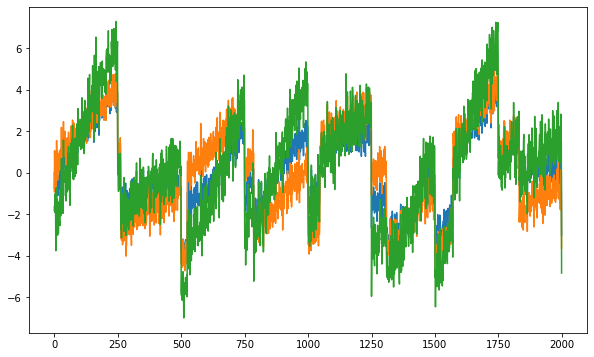

In [13]:
_ = plt.plot(X)

In [14]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

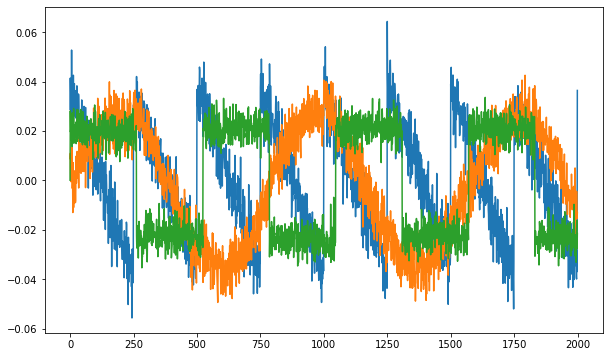

In [15]:
_ = plt.plot(S_)

# Real audio example

In [16]:
from scipy.io import wavfile

sampling_rate, mix1 = wavfile.read('data/mix1.wav')
sampling_rate, mix2 = wavfile.read('data/mix2.wav')

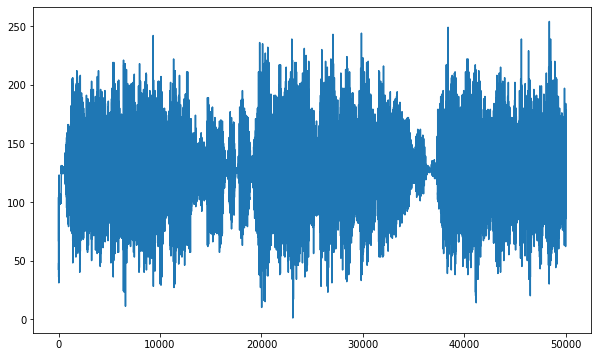

In [17]:
_ = plt.plot(mix1)

In [18]:
from IPython.display import Audio
Audio(mix1, rate=sampling_rate)

In [19]:
X = np.c_[mix1, mix2]

# Running ICA

In [20]:
ica = FastICA(n_components=2)
S = ica.fit_transform(X)

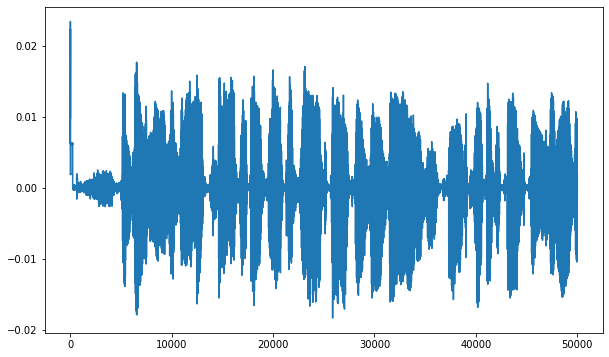

In [21]:
plt.plot(S[:,0])

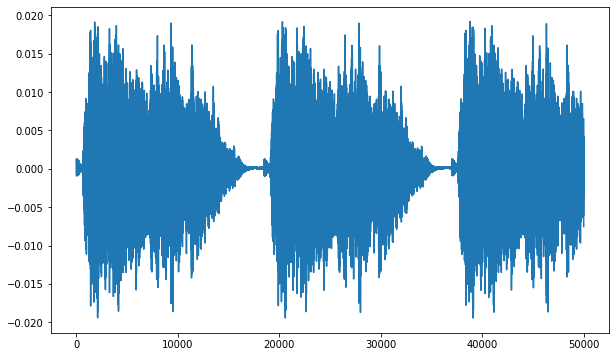

In [22]:
plt.plot(S[:,1])

In [23]:
from IPython.display import Audio
Audio(S[:, 0], rate=sampling_rate)

In [24]:
from IPython.display import Audio
Audio(S[:, 1], rate=sampling_rate)